# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 06: Exploratory Data Analysis - EDA

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

### 0. What do we want to do today?

Our goal in **Session06** is to learn how to perform exploratory data analysis. We will:
- load the data,
- inspect the nature of the data,
- use charts of different kind for representing data graphically,
- make some conclusions based on the previous steps.

### 1. Where am I?

Your are (or you should be...) in the `session06` directory, where we find 
- this notebook, 
- it's HTML version, 
- another directory `_data` that contains CSV files.

In [135]:
import os

work_dir = os.getcwd()
print(work_dir)
print(os.listdir(work_dir))
data_dir = os.path.join(work_dir, "_data")
os.listdir(data_dir)

/home/ikacikac/workspace/dss03python2023/session06
['dss03_py_session06_b.ipynb', 'dss03_py_session06_goran.ipynb', '_img', 'dss03_py_session06.html', 'data_mumbojumbo.ipynb', 'dss03_py_session06.ipynb', '_data']


['airports.csv',
 'planes.csv',
 'weather.csv',
 'flights_session06.csv',
 'flights.csv',
 'airlines.csv']

### Load the libraries

In [136]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
import warnings

warnings.filterwarnings("ignore")

### Loading the data

Today we are working with [nycflights13 dataset](https://github.com/tidyverse/nycflights13). The data in `nycflights13` were originaly provided in an R package; we have extracted all tables present to CSV files and placed them in our `_data` directory to play with. It consists of data about flights that departed all airports in NYC in 2013 (tables: `airlines`, `airports`, `weather`, `flights` and `planes`).

Also includes useful metadata on airlines, airports, weather, and planes, but we will be using these in next session.

First things first. We shall start with loading the flight data and inspecting the data.

In [138]:
df = pd.read_csv('_data/flights_session06.csv', index_col=0)

df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116.0,762,6,0,2013-01-01 06:00:00


#### Columns (features) description

- **year, month, day** - Date of departure.
- **dep_time, arr_time** - Actual departure and arrival times (format HHMM or HMM), local tz.
- **sched_dep_time, sched_arr_time** - Scheduled departure and arrival times (format HHMM or HMM), local tz.
- **dep_delay, arr_delay** - Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- **carrier** - Originally it is two letter carrier abbreviation. For the purpose of this session it is the full name of the airline.
- **flight** - Flight number.
- **tailnum** - Plane tail number. See planes for additional metadata.
- **origin, dest** - Origin and destination. Originally these are the abbreviations of airport names. This time we use full names for better understanding.
- **air_time** - Amount of time spent in the air, in minutes.
- **distance** - Distance between airports, in miles.
- **hour, minute** - Time of scheduled departure broken into hour and minutes.
- **time_hour** - Scheduled date and hour of the flight as a POSIXct date. Along with origin, can be used to join flights data to weather data.

What is POSIXct date format? 
> POSIXct stores date and time in seconds with the number of seconds beginning at 1 January 1970. Negative numbers are used to store dates prior to 1970. Thus, the POSIXct format stores each date and time as a single value in units of seconds.

Now that we have the overview, we want to check the data for missing values.

### Cleaning the data

In [139]:
(df.isna()
   .sum()
   .reset_index()
   .rename(columns={'index': 'feature', 0: 'no_nulls'})
   .sort_values('no_nulls', ascending=False)
   .assign(perc_nulls = lambda x: x['no_nulls'] / len(df) * 100))

,feature,no_nulls,perc_nulls
8,arr_delay,9430,2.800081
14,air_time,9430,2.800081
6,arr_time,8713,2.587180
3,dep_time,8255,2.451184
5,dep_delay,8255,2.451184
11,tailnum,2512,0.745896
0,year,0,0.000000
12,origin,0,0.000000
17,minute,0,0.000000
16,hour,0,0.000000


Let's analyse this expression in a step by step manner.

In [140]:
df.isna()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336772,False,False,False,True,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False
336773,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False
336774,False,False,False,True,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False


In [141]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [142]:
df.isna().sum().reset_index()

,index,0
0,year,0
1,month,0
2,day,0
3,dep_time,8255
4,sched_dep_time,0
5,dep_delay,8255
6,arr_time,8713
7,sched_arr_time,0
8,arr_delay,9430
9,carrier,0


In [143]:
(df.isna()
   .sum()
   .reset_index()
   .rename(columns={'index': 'feature', 0: 'no_nulls'}))

,feature,no_nulls
0,year,0
1,month,0
2,day,0
3,dep_time,8255
4,sched_dep_time,0
5,dep_delay,8255
6,arr_time,8713
7,sched_arr_time,0
8,arr_delay,9430
9,carrier,0


In [144]:
(df.isna()
   .sum()
   .reset_index()
   .rename(columns={'index': 'feature', 0: 'no_nulls'})
   .sort_values('no_nulls', ascending=False))

,feature,no_nulls
8,arr_delay,9430
14,air_time,9430
6,arr_time,8713
3,dep_time,8255
5,dep_delay,8255
11,tailnum,2512
0,year,0
12,origin,0
17,minute,0
16,hour,0


And as of the following: `.assign(perc_nulls = lambda x: x['no_nulls'] / len(df) * 100))`: we need to introduce the concept of anonymous (or *lambda* functions) at this point.

By know you know how to define a function. This function can be everything from a complex to a very simple one in terms of what it does.

Remember the function for creating the scheme for a given string, from the previous session?

```python
def scheme_string(s):
    print('')
    print('String:', s)
    print('')
    print('Scheme:')
    print('|'.join(f'{x: >3}' for x in range(len(s))))
    print(' '.join([f'{x: >3}' for x in s]))
    print('|'.join(f'{-x: >3}' for x in range(len(s), 0, -1)))
    print()
    print('Length:', len(s))
```

You could say this is not a trivial function. But, what if you wanted to create very simple function that returns square of a given value?


In [145]:
def square_it(a):
    return a**2

In [146]:
square_it(2)

4


For the purposes of having to define simple function, maybe even for a one time use, Python introduces *lambda* functions. These similar to user-defined functions *except for they have no name*. We also say that a lambda function is an *anonymous function* because of that.

Let's define *lambda* function that does the same thing.

In [147]:
f = lambda x: x**2

f(10)

100

But this is not anonuymous! This however is:

In [148]:
(lambda x: x**2)(3)

9

In [149]:
(lambda x,y: x+y)(5,6)

11

Lambda functions use no `return`: they will return the results of the expression. Remember: use them only for very simple things!

Back to our example: if we know that `pd.DataFrame.assign` assign new columns to a DataFrame (please c.f. the [Pandas documentation on pandas.DataFrame.assign](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html)), and that our DataFrame at this point looks like this: 

In [150]:
(df.isna()
   .sum()
   .reset_index()
   .rename(columns={'index': 'feature', 0: 'no_nulls'})
   .sort_values('no_nulls', ascending=False))

,feature,no_nulls
8,arr_delay,9430
14,air_time,9430
6,arr_time,8713
3,dep_time,8255
5,dep_delay,8255
11,tailnum,2512
0,year,0
12,origin,0
17,minute,0
16,hour,0


In [151]:
df1 = df.isna().sum()\
   .reset_index()\
   .rename(columns={'index': 'feature', 0: 'no_nulls'})\
   .sort_values('no_nulls', ascending=False)

len(df1)

19

... then `.assign(perc_nulls = lambda x: x['no_nulls'] / len(df) * 100))` will add a new column `perc_nulls` which is computed from a lambda function (1) taking the `no_nulls` column, (2) dividing it by the number of rows of `df` returned from `len(df)`, and (3) multiplying it by 100 to obtain percents:

In [152]:
(df.isna()
   .sum()
   .reset_index()
   .rename(columns={'index': 'feature', 0: 'no_nulls'})
   .sort_values('no_nulls', ascending=False)
   .assign(perc_nulls = lambda x: x['no_nulls'] / len(df) * 100))

,feature,no_nulls,perc_nulls
8,arr_delay,9430,2.800081
14,air_time,9430,2.800081
6,arr_time,8713,2.587180
3,dep_time,8255,2.451184
5,dep_delay,8255,2.451184
11,tailnum,2512,0.745896
0,year,0,0.000000
12,origin,0,0.000000
17,minute,0,0.000000
16,hour,0,0.000000


Interesting! This gives us some idea of where we have missing values. From here, you can either decide to just discard these or go investigate and maybe impute the data yourself. In cases where the percentage of missing data is very low, like in ours, you may opt to discard these right away. However, you should be careful with discarding because these percentages show you just part of the picture. What do we mean? Let's view a couple of examples.

First, let's look at the visualizations of our missing data.

![](_img/missing_data_example_a.png)

Here, black lines indicate missing values for each column. This also gives you part of the picture. Let's group flights with missing values and display only the columns that have missing values.

![](_img/missing_data_example_b.png)

Based on this view, you can be sure that discarding flights with missing values will remove just a small portion of flights from the original data set.

The scenario could easily be where missing value cells are not neatly grouped. Look at this example:

![](_img/missing_data_example_c.png)

And let's do the same thing as with our data.

![](_img/missing_data_example_d.png)


What will happen if we discard all flights with missing values using `dropna` method? Yes, we will discard more than half of our data. This is not a good start.

Conclusion: **pay attention** to the missing values and be very careful when discarding them.

But how does Pandas handle missing values? Did we mention `None` value in Python?

In [153]:
type(None)

NoneType

Python has its own way of handling missing values. NumPy too. And Pandas uses NumPy for `pd.Series` values. And `pd.DataFrame` uses `pd.Series` for storing column values. So, we have to go to NumPy to see what is happening.

The NumPy library has 3 different variables that are used for marking missing values (Not A Number - NAN). These are all of `float` type.

In [154]:
type(np.NaN), type(np.NAN), type(np.nan)

(float, float, float)

If we try to compare 'nothing' with 'nothing' we get `False`. This should make sense.

In [155]:
np.NaN == np.NaN, np.NaN == np.nan

(False, False)

But if we try to see if they are the same objects, we see that they are. This should also make sense.

In [156]:
(np.NaN is np.nan, 
 np.NaN is np.NAN,  
 np.NAN is np.nan)

(True, True, True)

Why was this so important? Because when NumPy treats `NaN` values as `float`, then columns that should by their nature be of type `int`, but have missing values, are treated as `float`. This is the reason why columns that should be of type `int` but have a missing value are treated as `float`. Check it out:

In [157]:
null_columns = df.isna().sum().where(lambda x: x > 0).dropna().index.to_list()

In [158]:
df[null_columns].head()

,dep_time,dep_delay,arr_time,arr_delay,tailnum,air_time
0,517.0,2.0,830.0,11.0,N14228,227.0
1,533.0,4.0,850.0,20.0,N24211,227.0
2,542.0,2.0,923.0,33.0,N619AA,160.0
3,544.0,-1.0,1004.0,-18.0,N804JB,183.0
4,554.0,-6.0,812.0,-25.0,N668DN,116.0


In [159]:
df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 0 to 336775
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   dep_time   328521 non-null  float64
 1   dep_delay  328521 non-null  float64
 2   arr_time   328063 non-null  float64
 3   arr_delay  327346 non-null  float64
 4   tailnum    334264 non-null  object 
 5   air_time   327346 non-null  float64
dtypes: float64(5), object(1)
memory usage: 18.0+ MB


Okay. Enough with this. Let's just drop flights that have missing values in any of the columns. We should be fine with this approach.

In [160]:
print(df.shape)

df = df.dropna()

print(df.shape)

(336776, 19)
(327346, 19)


In [161]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116.0,762,6,0,2013-01-01 06:00:00


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  flight          327346 non-null  int64  
 11  tailnum         327346 non-null  object 
 12  origin          327346 non-null  object 
 13  dest            327346 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        327346 non-null  int64  
 16  hour            327346 non-null  int64  
 17  minute    

Pandas DataFrame has a great method for trying to correctly recognize column data types. It is called `convert_dtypes`. Let's see what the result is.

In [163]:
df = df.convert_dtypes()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            327346 non-null  Int64 
 1   month           327346 non-null  Int64 
 2   day             327346 non-null  Int64 
 3   dep_time        327346 non-null  Int64 
 4   sched_dep_time  327346 non-null  Int64 
 5   dep_delay       327346 non-null  Int64 
 6   arr_time        327346 non-null  Int64 
 7   sched_arr_time  327346 non-null  Int64 
 8   arr_delay       327346 non-null  Int64 
 9   carrier         327346 non-null  string
 10  flight          327346 non-null  Int64 
 11  tailnum         327346 non-null  string
 12  origin          327346 non-null  string
 13  dest            327346 non-null  string
 14  air_time        327346 non-null  Int64 
 15  distance        327346 non-null  Int64 
 16  hour            327346 non-null  Int64 
 17  minute          327346 non-nu

Voila. Once we removed `NaN` values, Pandas recognized all of the numeric columns as `int` data types. Also, columns of type "object" are now of type "string".

In [164]:
df.select_dtypes('int64').head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
0,2013,1,1,517,515,2,830,819,11,1545,227,1400,5,15
1,2013,1,1,533,529,4,850,830,20,1714,227,1416,5,29
2,2013,1,1,542,540,2,923,850,33,1141,160,1089,5,40
3,2013,1,1,544,545,-1,1004,1022,-18,725,183,1576,5,45
4,2013,1,1,554,600,-6,812,837,-25,461,116,762,6,0


What can we conclude based on this subset of "integer" columns?

Well, here is what we can see:
- `year`, `month`, `day`, `hour` and `minute` are surely integers, but there is hardly any point in doing arithmetic operations with them. These are not categorical either. Maybe we can observe them as ordinal-type variables?
- `sched_dep_time` and `sched_arr_time` have a specific format, i.e., HHMM or HMM, and are not to be viewed as integers. We have to deal with this somehow.
- `flight` is the number of the flight. This should be a nominal (categorical) variable or just a string.
- `dep_delay` is the delay in minutes. We can use this as is.
- `air_time` is, as the name says, airplane air time in minutes.
- `dep_time` and `arr_time` are of the same format as `sched_dep_time` and `sched_arr_time`. We have to deal with them properly.

What `dep_time` and `arr_time` actually stands for? 

> The **departure time** is the moment that your plane **pushes back from the gate**, not the time it takes off. 

> The **arrival time** is the moment that your plane **pulls into the gate**, not the time it touches down on the runway. 

Let's look at the columns of `string` type.

In [165]:
df.select_dtypes('string')

,carrier,tailnum,origin,dest,time_hour
0,United Air Lines Inc.,N14228,Newark Liberty Intl,George Bush Intercontinental,2013-01-01 05:00:00
1,United Air Lines Inc.,N24211,La Guardia,George Bush Intercontinental,2013-01-01 05:00:00
2,American Airlines Inc.,N619AA,John F Kennedy Intl,Miami Intl,2013-01-01 05:00:00
3,JetBlue Airways,N804JB,John F Kennedy Intl,BQN,2013-01-01 05:00:00
4,Delta Air Lines Inc.,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,2013-01-01 06:00:00
...,...,...,...,...,...
336765,JetBlue Airways,N354JB,John F Kennedy Intl,Syracuse Hancock Intl,2013-09-30 22:00:00
336766,JetBlue Airways,N281JB,John F Kennedy Intl,Buffalo Niagara Intl,2013-09-30 22:00:00
336767,JetBlue Airways,N346JB,John F Kennedy Intl,Greater Rochester Intl,2013-09-30 22:00:00
336768,JetBlue Airways,N565JB,John F Kennedy Intl,General Edward Lawrence Logan Intl,2013-09-30 22:00:00


Okay, this mostly makes sense, except for this `time_hour` column. We already said this is a special column for joining the rest of the data, stored in other CSV files in `_data` folder. The good thing about Pandas is that it can easily parse this as a date and time. Let's just give it a quick demo:

In [166]:
_time_hour = pd.to_datetime(df['time_hour'])

_time_hour

0        2013-01-01 05:00:00
1        2013-01-01 05:00:00
2        2013-01-01 05:00:00
3        2013-01-01 05:00:00
4        2013-01-01 06:00:00
                 ...        
336765   2013-09-30 22:00:00
336766   2013-09-30 22:00:00
336767   2013-09-30 22:00:00
336768   2013-09-30 22:00:00
336769   2013-09-30 23:00:00
Name: time_hour, Length: 327346, dtype: datetime64[ns]

Okay, big deal. What is the benefit of this? Well, you can work with this in a very interesting way.

In [167]:
_time_hour.dt.hour.head()

0    5
1    5
2    5
3    5
4    6
Name: time_hour, dtype: int64

In [168]:
_time_hour.dt.year.head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: time_hour, dtype: int64

In [169]:
_time_hour.dt.strftime('%Y-%m-%d').head()

0    2013-01-01
1    2013-01-01
2    2013-01-01
3    2013-01-01
4    2013-01-01
Name: time_hour, dtype: object

In [170]:
_time_hour.dt.strftime('%H-%M-%S').head()

0    05-00-00
1    05-00-00
2    05-00-00
3    05-00-00
4    06-00-00
Name: time_hour, dtype: object

In [171]:
(_time_hour - pd.Timedelta('10 days')).head()

0   2012-12-22 05:00:00
1   2012-12-22 05:00:00
2   2012-12-22 05:00:00
3   2012-12-22 05:00:00
4   2012-12-22 06:00:00
Name: time_hour, dtype: datetime64[ns]

Working with date and time is a separate course in itself. This was just a small showoff just for you to get the feel of what you can do with the datetime type of column.

Ok, let's get back to our data set. Let's refresh our memory of the data set's content.

In [172]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533,529,4,850,830,20,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542,540,2,923,850,33,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544,545,-1,1004,1022,-18,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554,600,-6,812,837,-25,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116,762,6,0,2013-01-01 06:00:00


Let's do some column data type conversion. Remember, some of the columns are mistakenly "recognized" as being of the numeric type and should be converted to either string (object) or category.

In [173]:
df = df.astype({'flight': 'string'})

In [174]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533,529,4,850,830,20,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542,540,2,923,850,33,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544,545,-1,1004,1022,-18,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554,600,-6,812,837,-25,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116,762,6,0,2013-01-01 06:00:00


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            327346 non-null  Int64 
 1   month           327346 non-null  Int64 
 2   day             327346 non-null  Int64 
 3   dep_time        327346 non-null  Int64 
 4   sched_dep_time  327346 non-null  Int64 
 5   dep_delay       327346 non-null  Int64 
 6   arr_time        327346 non-null  Int64 
 7   sched_arr_time  327346 non-null  Int64 
 8   arr_delay       327346 non-null  Int64 
 9   carrier         327346 non-null  string
 10  flight          327346 non-null  string
 11  tailnum         327346 non-null  string
 12  origin          327346 non-null  string
 13  dest            327346 non-null  string
 14  air_time        327346 non-null  Int64 
 15  distance        327346 non-null  Int64 
 16  hour            327346 non-null  Int64 
 17  minute          327346 non-nu

Let's quickly see if there are duplicate rows. This is also very important.

In [176]:
df.duplicated().any()

False

Now we are ready to do some data exploration!

### Data Exploration

So far, this is our dataset:

In [177]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533,529,4,850,830,20,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542,540,2,923,850,33,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544,545,-1,1004,1022,-18,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554,600,-6,812,837,-25,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116,762,6,0,2013-01-01 06:00:00


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            327346 non-null  Int64 
 1   month           327346 non-null  Int64 
 2   day             327346 non-null  Int64 
 3   dep_time        327346 non-null  Int64 
 4   sched_dep_time  327346 non-null  Int64 
 5   dep_delay       327346 non-null  Int64 
 6   arr_time        327346 non-null  Int64 
 7   sched_arr_time  327346 non-null  Int64 
 8   arr_delay       327346 non-null  Int64 
 9   carrier         327346 non-null  string
 10  flight          327346 non-null  string
 11  tailnum         327346 non-null  string
 12  origin          327346 non-null  string
 13  dest            327346 non-null  string
 14  air_time        327346 non-null  Int64 
 15  distance        327346 non-null  Int64 
 16  hour            327346 non-null  Int64 
 17  minute          327346 non-nu

In [179]:
df = df.reset_index(drop=True)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327346 entries, 0 to 327345
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   year            327346 non-null  Int64 
 1   month           327346 non-null  Int64 
 2   day             327346 non-null  Int64 
 3   dep_time        327346 non-null  Int64 
 4   sched_dep_time  327346 non-null  Int64 
 5   dep_delay       327346 non-null  Int64 
 6   arr_time        327346 non-null  Int64 
 7   sched_arr_time  327346 non-null  Int64 
 8   arr_delay       327346 non-null  Int64 
 9   carrier         327346 non-null  string
 10  flight          327346 non-null  string
 11  tailnum         327346 non-null  string
 12  origin          327346 non-null  string
 13  dest            327346 non-null  string
 14  air_time        327346 non-null  Int64 
 15  distance        327346 non-null  Int64 
 16  hour            327346 non-null  Int64 
 17  minute          327346 non-nu

#### Contigency tables

So far we know that flight origins are from the NYC airports. 

Let us say we want to know frequencies of flights for each carrier per airport of departure. 

This is a place and time to introduce *contigency tables*. 

We use them to show frequencies for combinations of two categorical variables. These are also referred to as *crosstabulations* or *two-way tables*. In Pandas we create them by using library's `crosstab` function, by specifying which column's values will be forming the crosstab's rows (index) or columns (columns). 

In our case we are going to use columns **carrier** and **origin**.

In [181]:
pd.crosstab(index=df['carrier'], columns=df['origin'])

origin,John F Kennedy Intl,La Guardia,Newark Liberty Intl
carrier,,,
AirTran Airways Corporation,0,3175,0
Alaska Airlines Inc.,0,0,709
American Airlines Inc.,13600,14984,3363
Delta Air Lines Inc.,20559,22804,4295
Endeavor Air Inc.,13742,2359,1193
Envoy Air,6838,16102,2097
ExpressJet Airlines Inc.,1326,8225,41557
Frontier Airlines Inc.,0,681,0
Hawaiian Airlines Inc.,342,0,0


But how does Pandas create this table? Well, we will see exact steps in next session, but for now we can say that this looks like some sort of grouping, right?

Let's refresh our memory of using `groupby` method.

In [182]:
# display first 10 rows
df.groupby(['carrier', 'origin'])['air_time']\
  .count()\
  .reset_index()[:10]

# but why 'air_time'?

,carrier,origin,air_time
0,AirTran Airways Corporation,La Guardia,3175
1,Alaska Airlines Inc.,Newark Liberty Intl,709
2,American Airlines Inc.,John F Kennedy Intl,13600
3,American Airlines Inc.,La Guardia,14984
4,American Airlines Inc.,Newark Liberty Intl,3363
5,Delta Air Lines Inc.,John F Kennedy Intl,20559
6,Delta Air Lines Inc.,La Guardia,22804
7,Delta Air Lines Inc.,Newark Liberty Intl,4295
8,Endeavor Air Inc.,John F Kennedy Intl,13742
9,Endeavor Air Inc.,La Guardia,2359


There are many ways crosstabs can be created and we already showed one. 

Here is another:

In [183]:
pd.crosstab(index=df['carrier'], columns=df['origin'], normalize='index')

origin,John F Kennedy Intl,La Guardia,Newark Liberty Intl
carrier,,,
AirTran Airways Corporation,0.000000,1.000000,0.000000
Alaska Airlines Inc.,0.000000,0.000000,1.000000
American Airlines Inc.,0.425705,0.469027,0.105268
Delta Air Lines Inc.,0.431386,0.478493,0.090121
Endeavor Air Inc.,0.794611,0.136406,0.068983
Envoy Air,0.273116,0.643128,0.083756
ExpressJet Airlines Inc.,0.025945,0.160934,0.813121
Frontier Airlines Inc.,0.000000,1.000000,0.000000
Hawaiian Airlines Inc.,1.000000,0.000000,0.000000


This is very hard to read, right? There are better ways to present this table so it is easier to read it. We will get to this part.

We did normalize by rows, but what if we want to normalize by columns?

In [184]:
pd.crosstab(index=df['carrier'], columns=df['origin'], normalize='columns')

origin,John F Kennedy Intl,La Guardia,Newark Liberty Intl
carrier,,,
AirTran Airways Corporation,0.000000,0.031392,0.000000
Alaska Airlines Inc.,0.000000,0.000000,0.006053
American Airlines Inc.,0.124680,0.148151,0.028712
Delta Air Lines Inc.,0.188478,0.225470,0.036670
Endeavor Air Inc.,0.125982,0.023324,0.010186
Envoy Air,0.062689,0.159205,0.017904
ExpressJet Airlines Inc.,0.012156,0.081323,0.354803
Frontier Airlines Inc.,0.000000,0.006733,0.000000
Hawaiian Airlines Inc.,0.003135,0.000000,0.000000


If we want to add totals per rows and columns we can do it with:

In [185]:
pd.crosstab(index=df['carrier'], columns=df['origin'], margins=True)

origin,John F Kennedy Intl,La Guardia,Newark Liberty Intl,All
carrier,,,,
AirTran Airways Corporation,0,3175,0,3175
Alaska Airlines Inc.,0,0,709,709
American Airlines Inc.,13600,14984,3363,31947
Delta Air Lines Inc.,20559,22804,4295,47658
Endeavor Air Inc.,13742,2359,1193,17294
Envoy Air,6838,16102,2097,25037
ExpressJet Airlines Inc.,1326,8225,41557,51108
Frontier Airlines Inc.,0,681,0,681
Hawaiian Airlines Inc.,342,0,0,342


Let's sort this table by the sum of all flights for each airline.

In [186]:
pd.crosstab(index=df['carrier'], columns=df['origin'], margins=True)\
  .sort_values(by='All', ascending=False)

origin,John F Kennedy Intl,La Guardia,Newark Liberty Intl,All
carrier,,,,
All,109079,101140,117127,327346
United Air Lines Inc.,4478,7803,45501,57782
JetBlue Airways,41666,5911,6472,54049
ExpressJet Airlines Inc.,1326,8225,41557,51108
Delta Air Lines Inc.,20559,22804,4295,47658
American Airlines Inc.,13600,14984,3363,31947
Envoy Air,6838,16102,2097,25037
US Airways Inc.,2964,12541,4326,19831
Endeavor Air Inc.,13742,2359,1193,17294


So far, we used crosstabs for showing frequencies, i.e., flights counts. Can we show highest departure delay for the same categorical variables?

In [187]:
pd.crosstab(index=df['carrier'], 
            columns=df['origin'], 
            values=df['dep_delay'], 
            aggfunc=np.max)

origin,John F Kennedy Intl,La Guardia,Newark Liberty Intl
carrier,,,
AirTran Airways Corporation,<NA>,602,<NA>
Alaska Airlines Inc.,<NA>,<NA>,225
American Airlines Inc.,1014,803,896
Delta Air Lines Inc.,960,911,849
Endeavor Air Inc.,747,309,348
Envoy Air,1137,366,1126
ExpressJet Airlines Inc.,536,520,548
Frontier Airlines Inc.,<NA>,853,<NA>
Hawaiian Airlines Inc.,1301,<NA>,<NA>


What happens here? 

Well, for each group (table cell) Pandas provides a Series of **dep_delay** values. 

Then `aggfunc` is called upon it and the result is displayed in the table accordingly. 

Crosstabs are realy powerful!

And now visualizations!!

#### Visualizations


We already had some practice with visualizing the data from `pd.DataFrame`. Remember:

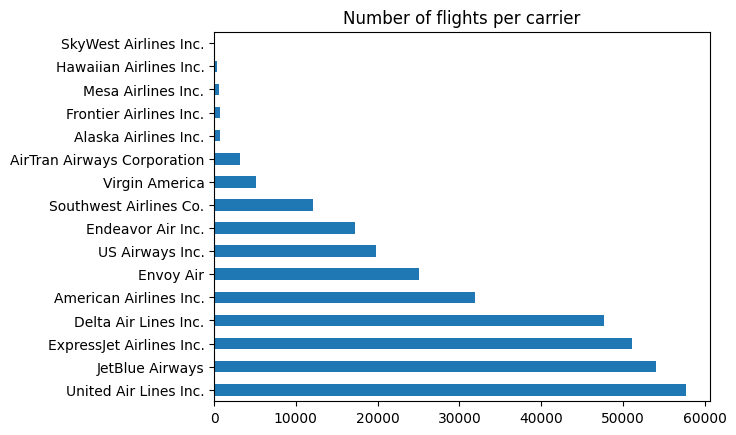

In [188]:
df['carrier'].value_counts().plot(kind='barh', title='Number of flights per carrier');

Even though this approach is quick and easy, it is used mostly for simple visuals. It also uses `matplotlib` library for drawing the elements on the image.

There are many ways you can use `matplotlib` to draw desired visuals, and there are also many libraries that use `matplotlib` as a base while adding more user-friendly methods. One of which is `seaborn` which we are going to use too.

But first, let's discuss some beginner steps for using `matplotlib`.

When trying to draw (plot) a chart using `matplotlib`, everything is organized in one `Figure`. There are many parts to the figure, and the most important ones are depicted in [this](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure) section of official matplotlib documentation.

Nothing beats practice. Let's plot the example of a quadratic function.

In [189]:
x = np.linspace(0, 50, 101)
y = x**2

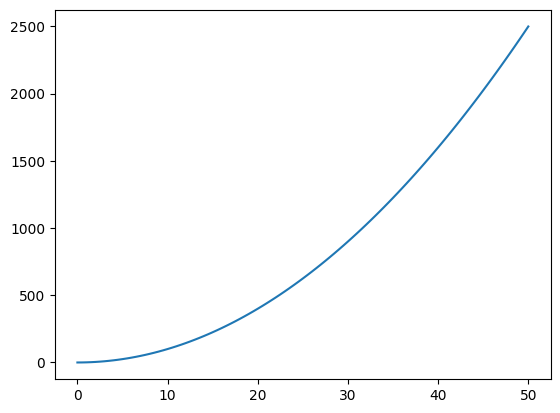

In [190]:
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show();

Can we do it simpler? Yes!

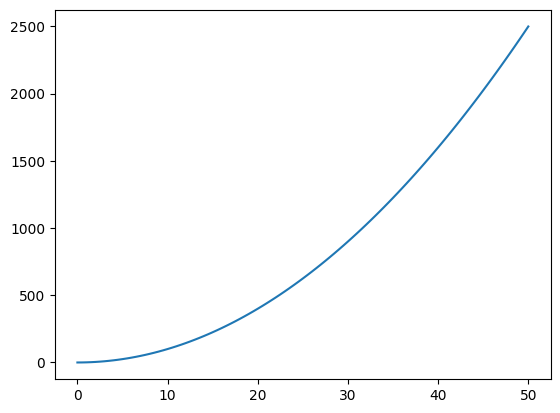

In [191]:
fig, ax = plt.subplots()
ax.plot(x, x**2)
plt.show();

What about if `x` is in range (-50, 50)?

And what if we omit calling `plt.show()`? 

In [192]:
x = np.linspace(-50, 50, 100)

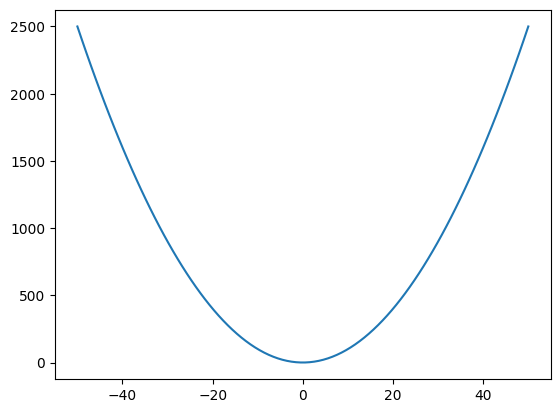

In [193]:
fig, ax = plt.subplots()

ax.plot(x, x**2);

From these examples, it is evident that:
- we first have to create `Figure` and  `Axes` objects. Figure holds every part of the drawing.
- `Axes` hold every part of the graph (charting area), and this includes the "coordinate system", multiple `Axis` (2, 3), x and y labels, ticks, grid, etc.
- We use the `ax` instance of `Axes` object and call its `plot` method that is plotting the line of our function. 

Like the official `matplotlib` [figure](https://matplotlib.org/stable/tutorials/introductory/quick_start.html#parts-of-a-figure) shows:
- `Axis` is what defines a "coordinate" system. Most of the time, we will be working with 2D charts, so we will have X and Y axes.
- `Axis` holds axis labels and minor and major ticks.
- `Axes` also has a title, legend, grid, and spines.


Let's see how this is plotted, and let's use our data.

In [194]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533,529,4,850,830,20,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542,540,2,923,850,33,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544,545,-1,1004,1022,-18,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554,600,-6,812,837,-25,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116,762,6,0,2013-01-01 06:00:00


Let's plot the number of flights per each carrier.

In [195]:
_df = df['carrier'].value_counts()\
                   .reset_index()\
                   .rename(columns={'index': 'carrier', 
                                    'carrier': 'no_of_flights'})

_df 

,carrier,no_of_flights
0,United Air Lines Inc.,57782
1,JetBlue Airways,54049
2,ExpressJet Airlines Inc.,51108
3,Delta Air Lines Inc.,47658
4,American Airlines Inc.,31947
5,Envoy Air,25037
6,US Airways Inc.,19831
7,Endeavor Air Inc.,17294
8,Southwest Airlines Co.,12044
9,Virgin America,5116


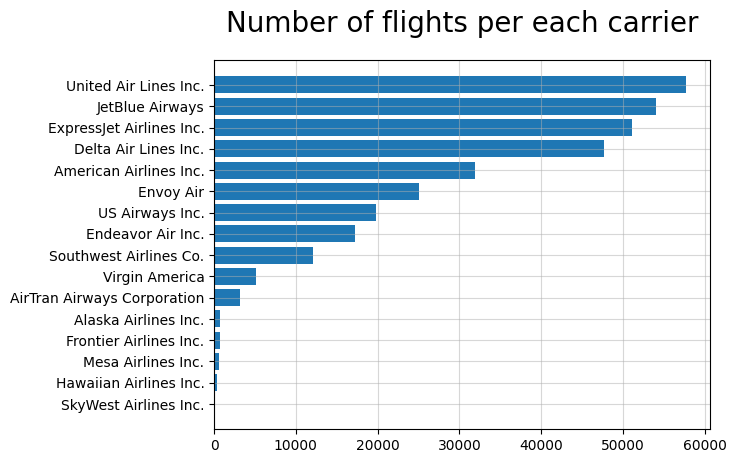

In [196]:
fig, ax = plt.subplots()
ax.barh(y='carrier', width='no_of_flights', data=_df)
ax.set_title('Number of flights per each carrier', size=20, pad=20)
ax.grid(alpha=.5)
ax.invert_yaxis() # attention!

But what about if we want to plot bars vertically? Not a problem. It is easy; just pay attention and change the arguments accordingly.

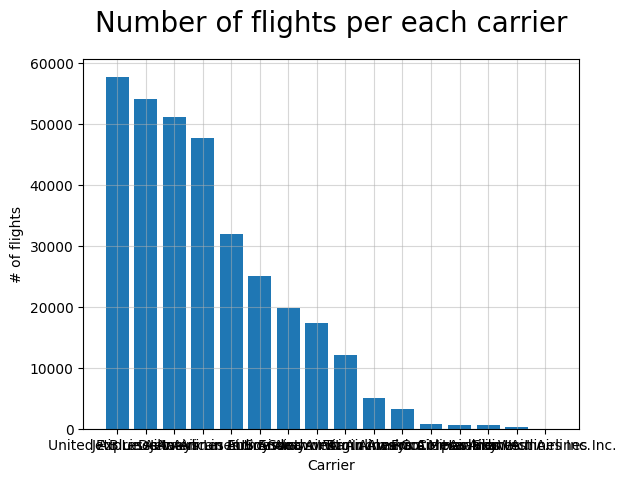

In [197]:
fig, ax = plt.subplots()
ax.bar(x='carrier', height='no_of_flights', data=_df)
ax.set_title('Number of flights per each carrier', size=20, pad=20)
ax.grid(alpha=.5)
ax.set_xlabel('Carrier')
ax.set_ylabel('# of flights');

Ouch! All X axis tick labels are drawn on top of each other. How can we correct this?

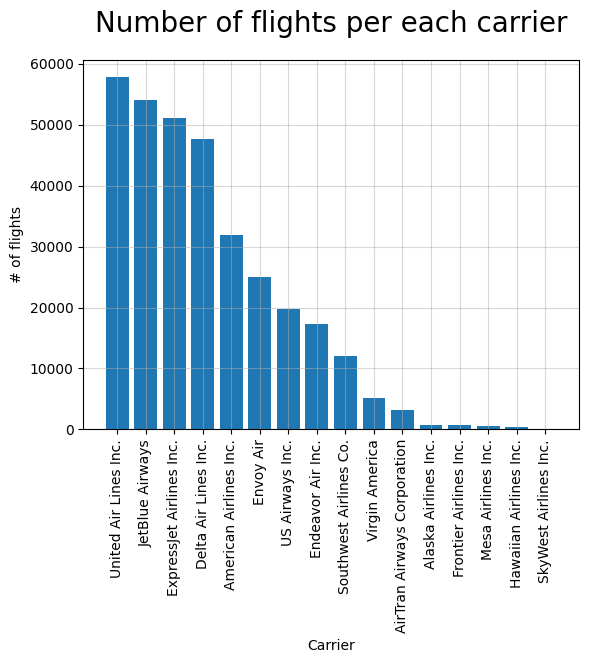

In [198]:
fig, ax = plt.subplots()
ax.bar(x='carrier', height='no_of_flights', data=_df)
ax.set_title('Number of flights per each carrier', size=20, pad=20)
ax.grid(alpha=.5)
ax.set_xlabel('Carrier')
ax.set_ylabel('# of flights');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

This looks about right. You can play with your chart, switch axis to make things easier to read and to understand. It is not as trivial as it may seem.

In [199]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533,529,4,850,830,20,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542,540,2,923,850,33,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544,545,-1,1004,1022,-18,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554,600,-6,812,837,-25,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116,762,6,0,2013-01-01 06:00:00


Let's now show the descriptive statistics for columns where this makes sense.

These are `air_time`, `distance`, `dep_delay`, `arr_delay`

In [200]:
df[['air_time', 'distance', 'dep_delay', 'arr_delay']].describe()

,air_time,distance,dep_delay,arr_delay
count,327346.000000,327346.000000,327346.000000,327346.000000
mean,150.686460,1048.371314,12.555156,6.895377
std,93.688305,735.908523,40.065688,44.633292
min,20.000000,80.000000,-43.000000,-86.000000
25%,82.000000,509.000000,-5.000000,-17.000000
50%,129.000000,888.000000,-2.000000,-5.000000
75%,192.000000,1389.000000,11.000000,14.000000
max,695.000000,4983.000000,1301.000000,1272.000000


There is a different way categorical or string-typed columns are presented by `describe` method.

In [201]:
df[['carrier', 'flight', 'tailnum', 'origin', 'dest']].describe()

,carrier,flight,tailnum,origin,dest
count,327346,327346,327346,327346,327346
unique,16,3835,4037,3,104
top,United Air Lines Inc.,15,N725MQ,Newark Liberty Intl,Hartsfield Jackson Atlanta Intl
freq,57782,956,544,117127,16837


If you remember, we already used **boxplots** for depicting some of these descriptive statistics. Let's use it for `air_time`.

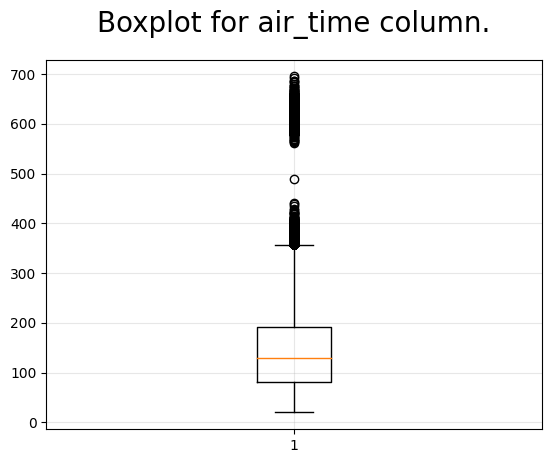

In [202]:
fig, ax = plt.subplots()

ax.boxplot(df['air_time']);
ax.grid(alpha=.3)
ax.set_title('Boxplot for air_time column.', size=20, pad=20);

What about if we draw it horizontally and make the figure a bit wider?

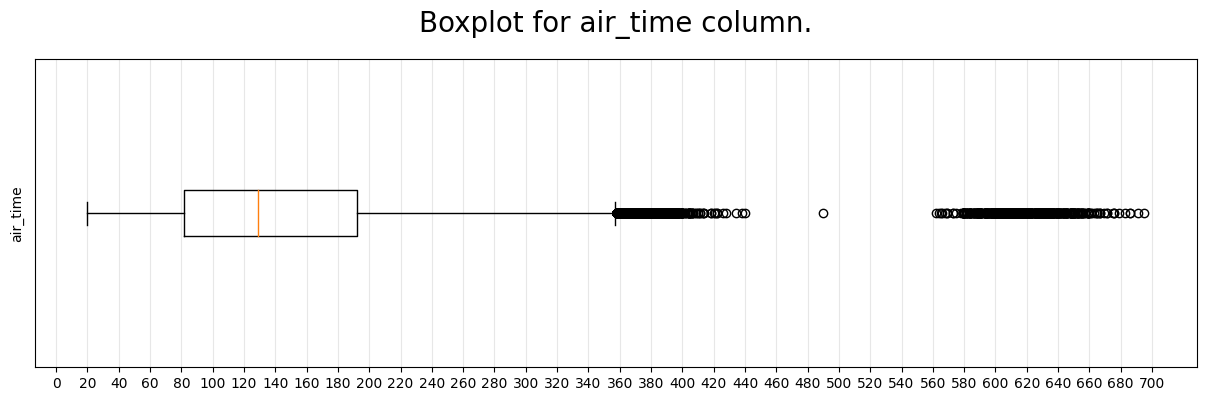

In [203]:
fig, ax = plt.subplots(figsize=(15, 4))

ax.boxplot(df['air_time'], vert=False);
ax.grid(alpha=.3)
ax.set_title('Boxplot for air_time column.', size=20, pad=20)
ax.set_xticks(np.arange(0, df.air_time.max()+20, 20));
ax.set_ylabel('air_time')
ax.set_yticks([]);

In [204]:
df.air_time.describe()

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64

Let's go over each of these:
- count speaks for itself,
- mean is the arithmetic mean of the values in `air_time` column. It's the sum of all values divided by the count.

In [205]:
df.air_time.sum() / len(df)

150.68646019807787

- std is standard deviation of the sample (our data is just the sample!).


Remember the variance? It is the measure of dispersion. More precisely, it shows how much, on average, each observation deviates from the population mean.

For the population, it is defined as:

$$\sigma^2 = \frac{\sum\limits_{i=1}^{n}{(x_i - \mu)^2}}{n}$$

where $\mu$ is the population mean, n is the population size.

However, the variance for the sample is:

$$s^2 = \frac{\sum\limits_{i=1}^{N}{(x_i - \bar{x})^2}}{N - 1}$$

where $\bar{x}$ is the sample mean, and N is the sample size.

You're probably wondering why there's an **N-1** in the denominator. Why do we need it?

Well, the variance of a sample is calculated based on the sample mean ($\bar{x}$), and not population mean ($\mu$). Because the sample mean is just an approximation of the population mean, population variance estimation is biased. We have to account for this by using the **N-1** correction. This way, our estimation of the population variance is unbiased. By setting the `ddof` parameter in `np.std` to 1, we introduce this correction.

The issue with the variance is that it is hard to interpret since all the differences between observations and mean are squared. This is the reason why we have to standardize it by taking the square root from it, and we get the standard deviation ($\sigma$).

Pay attention: Panda's `describe` method is taking this correction into account when calculating the value for the standard deviation of our sample.

In [206]:
def sample_dispersion(values, correction=True):
    numerator = np.sum((values - np.mean(values))**2)
    if correction is True:
        denominator = len(values) - 1
    else:
        denominator = len(values)
    return np.sqrt(numerator/denominator)

In [207]:
df.air_time.describe()

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64

In [208]:
sample_dispersion(df.air_time, correction=True)

93.6883046590099

In [209]:
np.std(df.air_time, ddof=1)

93.6883046590099

In [210]:
sample_dispersion(df.air_time, correction=False)

93.68816155602985

In [211]:
np.std(df.air_time, ddof=0)

93.68816155602985

The rest of the descriptive statistics are:
- `min` and `max`, which are obvious, and
- quartiles given with `25%`, `50%`, and `75%`.

Okay, so to start talking about quartiles, we shall first go into explaining what quantiles are.

Quantiles split probability distribution in equal parts.

When we talk about quantiles, most common ones are:
- **Quartiles** - split sorted data in 4 parts (3 quartiles).
- **Deciles** - split sorted data in 10 parts (9 deciles).
- **Percentiles** - split sorted data into 100 parts (99 percentiles).

So, quartiles divide numerical data into 4 quarters, so that each quarter is the same size.
- 1st quartile's value divides data so that it is bigger than 25% of the data and smaller than 75%.
- 2nd quartile divides data into equal parts (50% or the median).
- 3rd quartile divides data so that 75% of the data is smaller and 25% of the data has a higher value.

In [212]:
_arr = np.array([1,2,5,6,4,2,6,7,10,3])

How do we get quartiles? We use NumPy's `quantile` method. The second argument is the list of splitting points. Let's see an example:

In [213]:
np.quantile(_arr, q=[.25, .5, .75])

array([2.25, 4.5 , 6.  ])

Why is this so important? Well, there are 3 main measures of central tendency:
- mean,
- median, and
- mode.

Each of these gives just a part of the perspective when looking at the distribution of the data.

Let's go back to our `air_time` and see the values of these measures.

In [214]:
df.air_time.describe()

count    327346.000000
mean        150.686460
std          93.688305
min          20.000000
25%          82.000000
50%         129.000000
75%         192.000000
max         695.000000
Name: air_time, dtype: float64

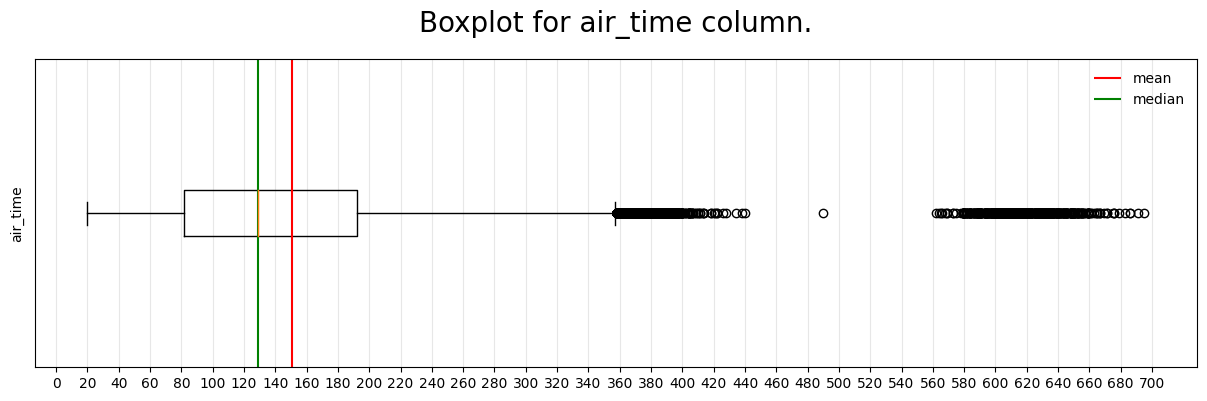

In [215]:
_air_time_mean = np.mean(df.air_time)
_air_time_median = np.median(df.air_time)

plt.figure(figsize=(15, 4))
plt.boxplot(df['air_time'], vert=False);
plt.grid(alpha=.3)
plt.title('Boxplot for air_time column.', size=20, pad=20)
plt.xticks(np.arange(0, df.air_time.max()+20, 20));
plt.ylabel('air_time')
plt.yticks([]);

# lets draw the mean and median
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
plt.vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')

# plot the legend
plt.legend(framealpha=.0);

Now that we know what quartiles are, let's refresh our knowledge of boxplots. The next explanation is a modified version from Wikipedia.

> A boxplot usually includes two parts:
>- a box, and
>- a set of whiskers,
>
>as shown in the previous graph. The box is drawn from Q1 to Q3, with a horizontal line drawn in the middle to denote the median. The whiskers can be defined in various ways. 
>
> In the most straightforward method, the boundary of the lower whisker is the minimum value of the data set, and the boundary of the upper whisker is the maximum value of the data set.
>
> Another popular choice for the boundaries of the whiskers is based on the 1.5 * IQR value. From above the upper quartile (Q3), a distance of 1.5 times the IQR is measured out, and a whisker is drawn up to the largest observed data point from the dataset that falls within this distance. Similarly, a distance of 1.5 times the IQR is measured out below the lower quartile (Q1) and a whisker is drawn down to the lowest observed data point from the dataset that falls within this distance. Because the whiskers must end at an observed data point, the whisker lengths can look unequal, even though 1.5 * IQR is the same for both sides. All other observed data points outside the boundary of the whiskers are plotted as outliers. The outliers can be plotted on the boxplot as a dot, a small circle, a star, etc.
>
>
> However, the whiskers can stand for several other things, such as:
>
>- The minimum and maximum value of the data set.
>- One standard deviation above and below the mean of the data set.
>- The 9th percentile and the 91st percentile of the data set.
>- The 2nd percentile and the 98th percentile of the data set.
>
> Wikipedia. 2002. "Box plot." Last modified February 17. 2023. https://en.wikipedia.org/wiki/Box_plot

Let's show this with the simple example:

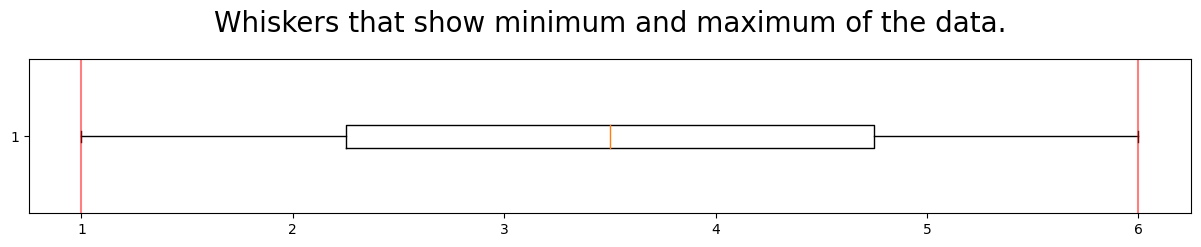

In [216]:
plt.figure(figsize=(15, 2))

x = [1,2,3,4,5,6]
plt.boxplot(x, vert=False);
ymin, ymax = plt.gca().get_ylim()

plt.vlines([np.min(x), np.max(x)], ymin=ymin, ymax=ymax, alpha=.5, color='red');
plt.title('Whiskers that show minimum and maximum of the data.', size=20, pad=20);

Now lets try with different set of data points.

First quartile value: 6.25
Third quartile value: 8.75
IQR value: 2.5
1.5 * IRQ value: 2.5, 12.5


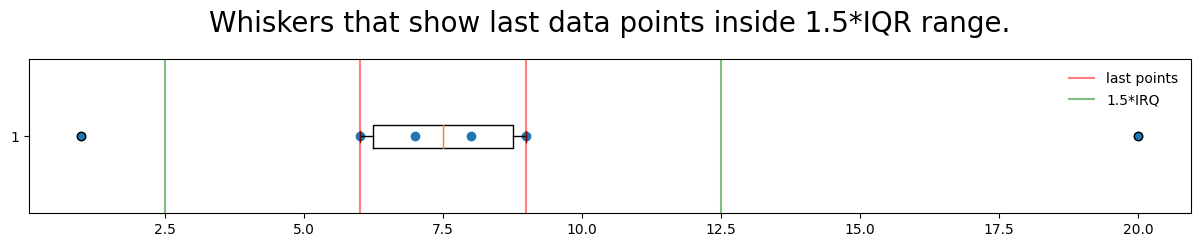

In [217]:
plt.figure(figsize=(15, 2))

x = [1,6,7,8,9,20]

q1, q3 = np.quantile(x, q=[.25, .75])
iqr = q3 - q1 
iqr_outlier_bounds = (q1 - 1.5*iqr, q3 + 1.5*iqr)

print(f'First quartile value: {q1}'
      f'\nThird quartile value: {q3}'
      f'\nIQR value: {iqr}'
      f'\n1.5 * IRQ value: {iqr_outlier_bounds[0]}, {iqr_outlier_bounds[1]}')

plt.boxplot(x, vert=False);

plt.scatter(x, y=[1]*len(x))

ymin, ymax = plt.gca().get_ylim()

plt.vlines([6, 9], ymin=ymin, ymax=ymax, alpha=.5, color='red', label='last points');
plt.vlines([iqr_outlier_bounds[0], iqr_outlier_bounds[1]], ymin=ymin, ymax=ymax, alpha=.5, color='green', label='1.5*IRQ');
plt.title('Whiskers that show last data points inside 1.5*IQR range.', size=20, pad=20);

plt.legend(framealpha=.0);

These examples pretty much sum it. Let's get back to our boxplot with air time.

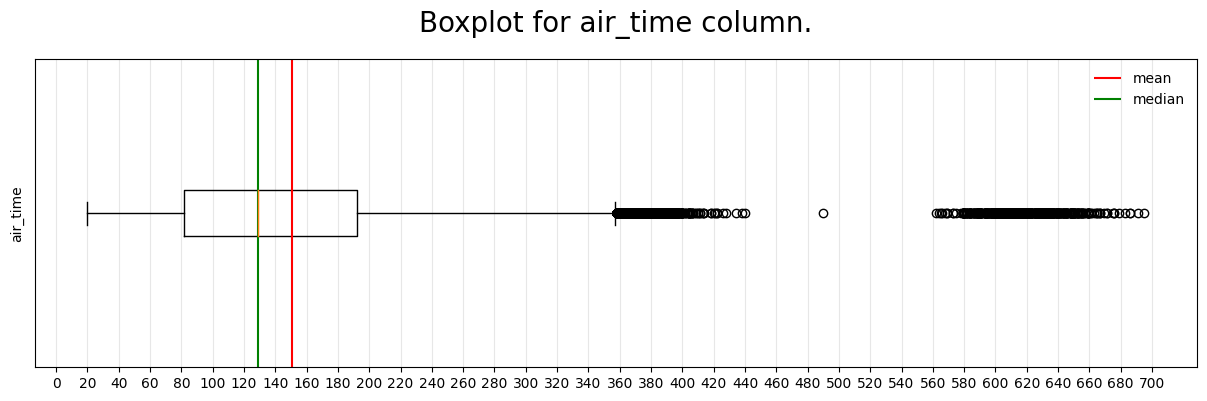

In [218]:
_air_time_mean = np.mean(df.air_time)
_air_time_median = np.median(df.air_time)

plt.figure(figsize=(15, 4))
plt.boxplot(df['air_time'], vert=False);
plt.grid(alpha=.3)
plt.title('Boxplot for air_time column.', size=20, pad=20)
plt.xticks(np.arange(0, df.air_time.max()+20, 20));
plt.ylabel('air_time')
plt.yticks([]);

# lets draw the mean and median
ymin, ymax = plt.gca().get_ylim()
plt.vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
plt.vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')

# plot the legend
plt.legend(framealpha=.0);

Here we can see that the mean is shifted to the left. It has a higher value than the median. This happens when the distribution is rightly skewed, i.e., there are outliers on the right end. Outliers affect mean more than median, so in case there are outliers, median should be used as a better representation of average. This can easily happen on the other side of the distribution when the mean is lower in value than the median. This shows that the distribution is left skewed, and the median is also a good representation of the average value.

We have mentioned mode, and it is specific in a way that it shows the most repetitive value in the data. When we are talking about nominal and ordinal variables, this is possible. However, doing this for other types of variables is not possible. This is why we will use `mode` in a different example. Here, `mode` is named **top**.

In [219]:
df[['carrier', 'flight', 'origin', 'dest']].describe()

,carrier,flight,origin,dest
count,327346,327346,327346,327346
unique,16,3835,3,104
top,United Air Lines Inc.,15,Newark Liberty Intl,Hartsfield Jackson Atlanta Intl
freq,57782,956,117127,16837


Let's try to view distribution of the `air_time` column.

Let's try putting both graphs in the same figure.

In [220]:
_air_time_mean = np.mean(df.air_time)
_air_time_median = np.median(df.air_time)

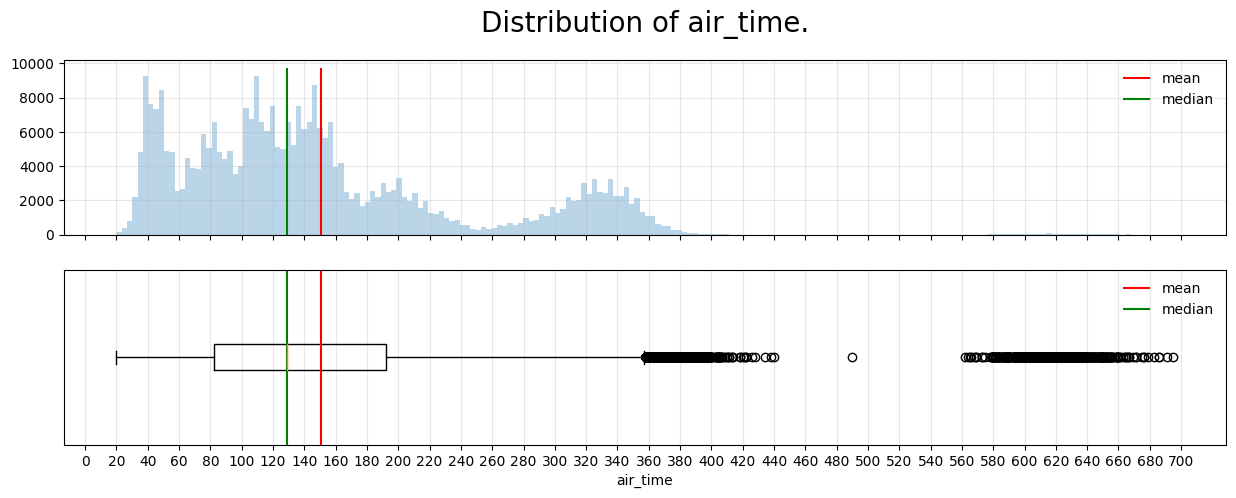

In [221]:
# we have to take figure and axes
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 5), sharex=True)

# flatten for easier indexing
axes = axes.flatten()

# plotting first chart
axes[0].hist(df.air_time, bins=200, alpha=.3)
axes[0].set_title('Distribution of air_time.', size=20, pad=20)
axes[0].grid(alpha=.3)

ymin, ymax = axes[0].get_ylim()
axes[0].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[0].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[0].legend(framealpha=.0);

# plotting second chart
axes[1].boxplot(df['air_time'], vert=False);
axes[1].grid(alpha=.3)
axes[1].set_xlabel('air_time')
axes[1].set_xticks(np.arange(0, df.air_time.max()+20, 20));
axes[1].set_yticks([]);

ymin, ymax = axes[1].get_ylim()
axes[1].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[1].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[1].legend(framealpha=.0);

In [222]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517,515,2,830,819,11,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533,529,4,850,830,20,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542,540,2,923,850,33,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544,545,-1,1004,1022,-18,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554,600,-6,812,837,-25,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116,762,6,0,2013-01-01 06:00:00


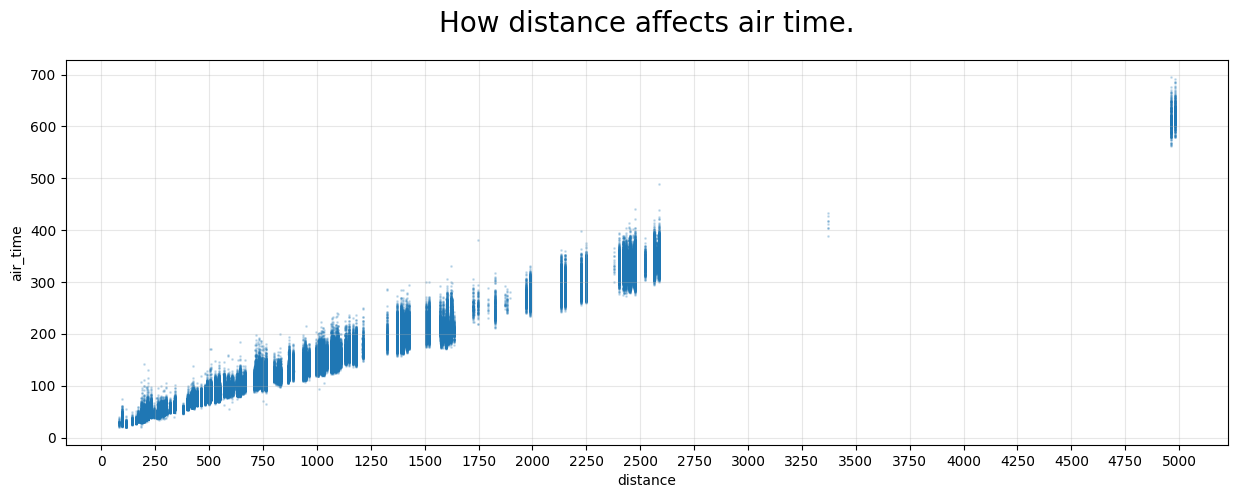

In [223]:
plt.figure(figsize=(15, 5))
plt.scatter(x=df.distance, y=df.air_time, s=1, alpha=.2)
plt.xlabel('distance')
plt.ylabel('air_time')
plt.title('How distance affects air time.', size=20, pad=20)
plt.grid(alpha=.3)
plt.xticks(np.arange(0, df.distance.max()+20, 250));


Who would say that the distance between the place of departure and arrival does indeed affect the time in the air?

Obviously, there are some big distance flights. Shall we take a look at these?

In [224]:
df[df.distance > 4000]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
162,2013,1,1,857,900,-3,1516,1530,-14,Hawaiian Airlines Inc.,51,N380HA,John F Kennedy Intl,Honolulu Intl,659,4983,9,0,2013-01-01 09:00:00
379,2013,1,1,1344,1344,0,2005,1944,21,United Air Lines Inc.,15,N76065,Newark Liberty Intl,Honolulu Intl,656,4963,13,44,2013-01-01 13:00:00
1061,2013,1,2,909,900,9,1525,1530,-5,Hawaiian Airlines Inc.,51,N380HA,John F Kennedy Intl,Honolulu Intl,638,4983,9,0,2013-01-02 09:00:00
1280,2013,1,2,1344,1344,0,1940,1944,-4,United Air Lines Inc.,15,N77066,Newark Liberty Intl,Honolulu Intl,634,4963,13,44,2013-01-02 13:00:00
1992,2013,1,3,914,900,14,1504,1530,-26,Hawaiian Airlines Inc.,51,N380HA,John F Kennedy Intl,Honolulu Intl,616,4983,9,0,2013-01-03 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325120,2013,9,28,1327,1329,-2,1710,1813,-63,United Air Lines Inc.,15,N66057,Newark Liberty Intl,Honolulu Intl,562,4963,13,29,2013-09-28 13:00:00
325676,2013,9,29,957,1000,-3,1405,1445,-40,Hawaiian Airlines Inc.,51,N384HA,John F Kennedy Intl,Honolulu Intl,580,4983,10,0,2013-09-29 10:00:00
325882,2013,9,29,1420,1329,51,1817,1813,4,United Air Lines Inc.,15,N66057,Newark Liberty Intl,Honolulu Intl,569,4963,13,29,2013-09-29 13:00:00
326657,2013,9,30,959,1000,-1,1438,1445,-7,Hawaiian Airlines Inc.,51,N392HA,John F Kennedy Intl,Honolulu Intl,603,4983,10,0,2013-09-30 10:00:00


In [225]:
df[df.distance > 4000].apply(lambda x: 'Honolulu Intl' in x['dest'], axis=1).all()

True

These flights are all to Honolulu International Airport. Makes sense.

Let's see what the distribution of flight times is to Honolulu Intl airport if the other airport is JFK in NYC.

But before that, let's see how many flights there are to Honolulu Intl airport, grouped by the place of departure.

In [226]:
(df.groupby(['origin', 'dest'])['air_time']
   .count()
   .reset_index()
   .rename(columns={'air_time': 'no_of_flights'})
   .query('origin == "Honolulu Intl" | dest == "Honolulu Intl"'))

,origin,dest,no_of_flights
23,John F Kennedy Intl,Honolulu Intl,342
170,Newark Liberty Intl,Honolulu Intl,359


Okay, let's view the distribution of air time for flights from John F Kennedy Intl to Honolulu Intl.


In [227]:
_df = df.loc[(df.origin == 'John F Kennedy Intl') & (df.dest == 'Honolulu Intl')]

_df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
162,2013,1,1,857,900,-3,1516,1530,-14,Hawaiian Airlines Inc.,51,N380HA,John F Kennedy Intl,Honolulu Intl,659,4983,9,0,2013-01-01 09:00:00
1061,2013,1,2,909,900,9,1525,1530,-5,Hawaiian Airlines Inc.,51,N380HA,John F Kennedy Intl,Honolulu Intl,638,4983,9,0,2013-01-02 09:00:00
1992,2013,1,3,914,900,14,1504,1530,-26,Hawaiian Airlines Inc.,51,N380HA,John F Kennedy Intl,Honolulu Intl,616,4983,9,0,2013-01-03 09:00:00
2882,2013,1,4,900,900,0,1516,1530,-14,Hawaiian Airlines Inc.,51,N384HA,John F Kennedy Intl,Honolulu Intl,639,4983,9,0,2013-01-04 09:00:00
3744,2013,1,5,858,900,-2,1519,1530,-11,Hawaiian Airlines Inc.,51,N381HA,John F Kennedy Intl,Honolulu Intl,635,4983,9,0,2013-01-05 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322116,2013,9,25,1001,1000,1,1508,1445,23,Hawaiian Airlines Inc.,51,N389HA,John F Kennedy Intl,Honolulu Intl,636,4983,10,0,2013-09-25 10:00:00
324072,2013,9,27,951,1000,-9,1442,1445,-3,Hawaiian Airlines Inc.,51,N390HA,John F Kennedy Intl,Honolulu Intl,629,4983,10,0,2013-09-27 10:00:00
324992,2013,9,28,955,1000,-5,1412,1445,-33,Hawaiian Airlines Inc.,51,N391HA,John F Kennedy Intl,Honolulu Intl,584,4983,10,0,2013-09-28 10:00:00
325676,2013,9,29,957,1000,-3,1405,1445,-40,Hawaiian Airlines Inc.,51,N384HA,John F Kennedy Intl,Honolulu Intl,580,4983,10,0,2013-09-29 10:00:00


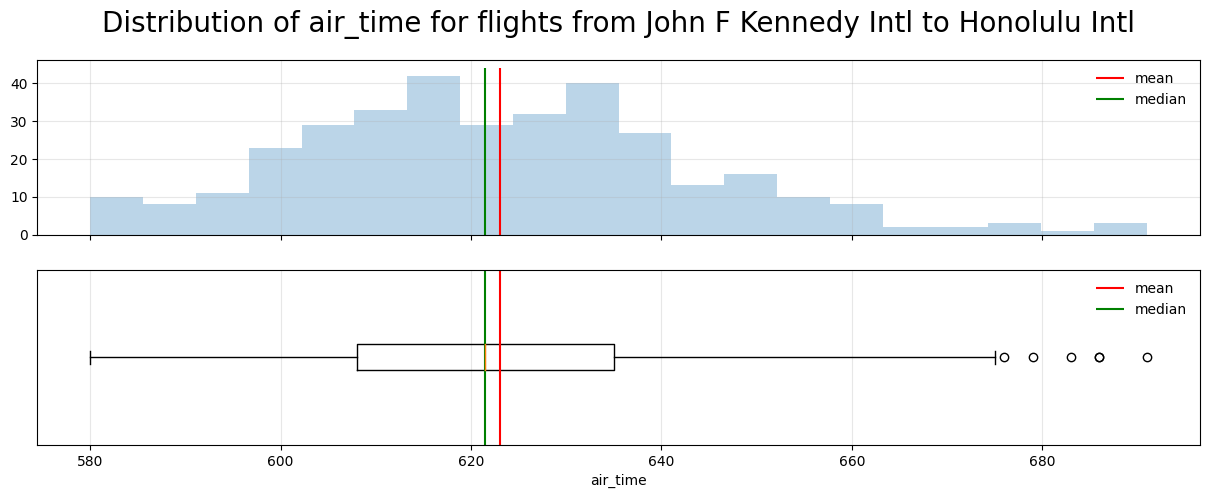

In [228]:
_air_time_mean = np.mean(_df.air_time)
_air_time_median = np.median(_df.air_time)

# we have to take figure and axes
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(15, 5), sharex=True)

# flatten for easier indexing
axes = axes.flatten()

# plotting first chart
axes[0].hist(_df.air_time, bins=20, alpha=.3)
axes[0].set_title('Distribution of air_time for flights from John F Kennedy Intl to Honolulu Intl', size=20, pad=20)
axes[0].grid(alpha=.3)

ymin, ymax = axes[0].get_ylim()
axes[0].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[0].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[0].legend(framealpha=.0);

# plotting second chart
axes[1].boxplot(_df.air_time, vert=False);
axes[1].grid(alpha=.3)
axes[1].set_xlabel('air_time')
axes[1].set_xticks(np.arange(0, df.air_time.max()+20, 20));
axes[1].set_yticks([]);

ymin, ymax = axes[1].get_ylim()
axes[1].vlines(x=[_air_time_mean], ymin=ymin, ymax=ymax, color='red', label='mean')
axes[1].vlines(x=[_air_time_median], ymin=ymin, ymax=ymax, color='green', label='median')
axes[1].legend(framealpha=.0);

Okay, so that' it, but can we check which carriers are having flights on this relation?

In [229]:
_df.carrier.value_counts()

Hawaiian Airlines Inc.    342
Name: carrier, dtype: Int64

Well, just one... the Hawaiian Airlines.



Here is another idea!

Let's find the 10 fastest carriers.

Keep in mind that distance is probably measured in miles and flight time is measured in minutes. We'll get the **miles/minute** speed measurement this way. Not **miles/hour**.

We can convert our air time to hours. Let's do that.

In [230]:
df['speed'] = df.distance / (df.air_time / 60)

In [231]:
df.groupby('carrier')['speed'].describe()

,count,mean,std,min,25%,50%,75%,max
carrier,,,,,,,,
AirTran Airways Corporation,3175.0,394.358094,34.192364,280.235294,371.707317,394.137931,419.449541,531.627907
Alaska Airlines Inc.,709.0,443.678889,21.720863,367.653061,428.928571,444.814815,458.980892,520.288809
American Airlines Inc.,31947.0,417.472739,47.461814,116.875000,392.000000,423.045685,450.410959,556.457143
Delta Air Lines Inc.,47658.0,418.462807,43.575184,123.296703,393.037975,423.776224,448.235294,703.384615
Endeavor Air Inc.,17294.0,345.430398,65.081449,92.459016,305.228833,349.900990,392.666667,517.664234
Envoy Air,25037.0,368.402836,50.822437,131.752577,342.089552,374.782609,402.962963,508.000000
ExpressJet Airlines Inc.,51108.0,362.943626,52.243521,123.076923,328.000000,366.857143,401.447368,650.322581
Frontier Airlines Inc.,681.0,425.172111,27.778219,349.640288,406.694561,424.454148,445.871560,498.461538
Hawaiian Airlines Inc.,342.0,480.357719,15.771798,432.677279,470.834646,481.062258,491.743421,515.482759


Well, to get top N of these, we would have to choose the metric by which we are sorting. How about we plot speed distribution for each of the carriers?

And, while we are trying to do this, let's try switching from using `matplotlib` to `seaborn`!

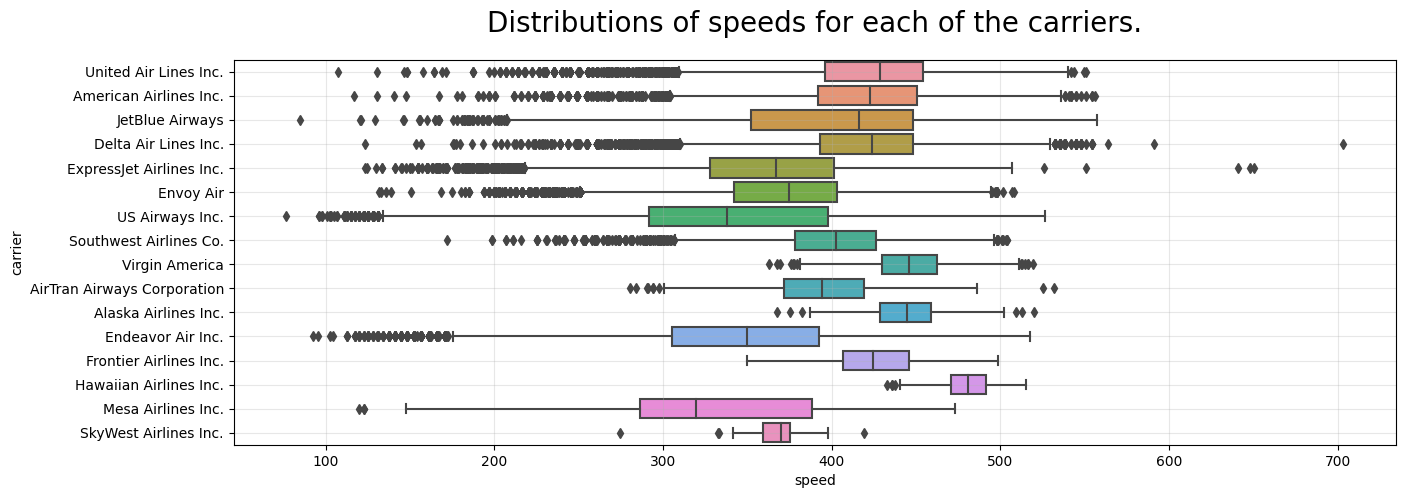

In [232]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='speed', y='carrier', data=df)
plt.title('Distributions of speeds for each of the carriers.', size=20, pad=20)
plt.grid(alpha=.3)

So, apparently, Hawaiian Airlines airplanes are the fastest on average. Could it be that longer flights are the "fastest" because the proportion of time waiting to take off and dock at the terminal to the overall time in air is smaller in comparison to other flights with a shorter distance?

Let's find out.

What do we need? Well, let's take the carrier that has the most flights in our data set.

It is the United Air Lines carrier.

From what we can see, this carrier has a lot of "outliers" on the lower side. At least this is what boxplot is detecting. But nonetheless, UA holds one of the widest distributions when compared to other carriers. This is probably because this carrier has a lot of departures to various destinations. Remember, this data set holds flights from NYC (all airports).

Let's see if the distance between the airports where United Air Lines has flights is somehow affecting the speed of its aircraft.

How do we want to do this? Well, we first have to make a histogram of distances, i.e., bin them somehow, and then do the boxplot for each bin.

In [233]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

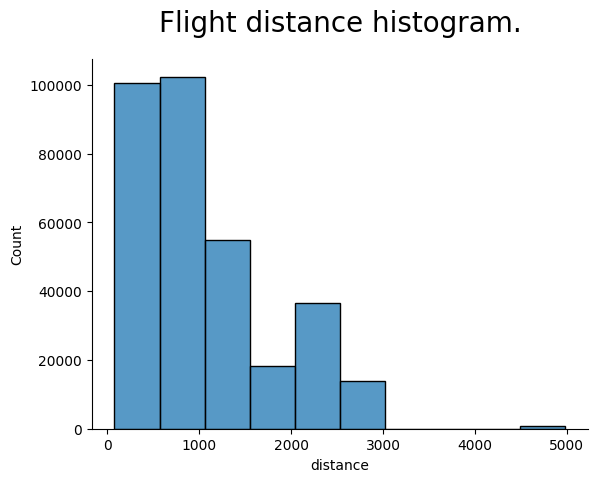

In [234]:
sns.histplot(x='distance', bins=10, element='bars', data=df)
sns.despine();
plt.title('Flight distance histogram.', size=20, pad=20);

In [235]:
# a lot of flights
df[df.carrier == 'United Air Lines Inc.'].shape

(57782, 20)

Let's create helping dataframe that will contain only the data we are interested in.

In [236]:
_df = df.loc[(df.carrier == 'United Air Lines Inc.'), ['distance', 'speed']].copy().reset_index(drop=True)

In [237]:
_df

,distance,speed
0,1400,370.044053
1,1416,374.273128
2,719,287.6
3,2475,430.434783
4,2565,426.315789
...,...,...
57777,937,457.073171
57778,200,300.0
57779,1400,480.0
57780,200,324.324324


The NumPy `histogram` method is able to create a histogram for a given array, in this case the **distance**. It returns counts per bin and bin edges. The bin edges array is just an array with increasing values where the bins are created.

In [238]:
_hist, _bin_edges = np.histogram(_df['distance'], bins=30)

In [239]:
_bin_edges

array([116.0, 277.56666666666666, 439.1333333333333, 600.7,
       762.2666666666667, 923.8333333333333, 1085.4, 1246.9666666666667,
       1408.5333333333333, 1570.1, 1731.6666666666665, 1893.2333333333333,
       2054.8, 2216.366666666667, 2377.9333333333334, 2539.5,
       2701.0666666666666, 2862.633333333333, 3024.2, 3185.7666666666664,
       3347.333333333333, 3508.9, 3670.4666666666667, 3832.0333333333333,
       3993.6, 4155.166666666666, 4316.733333333334, 4478.3,
       4639.866666666667, 4801.433333333333, 4963.0], dtype=object)

In [240]:
_hist

array([ 3307,  1866,     3,  6853,     2, 11955,   267,  4991,  3878,
        5025,    68,     0,  1111,  1990,  9371,  6728,     0,     0,
           0,     0,     8,     0,     0,     0,     0,     0,     0,
           0,     0,   359])

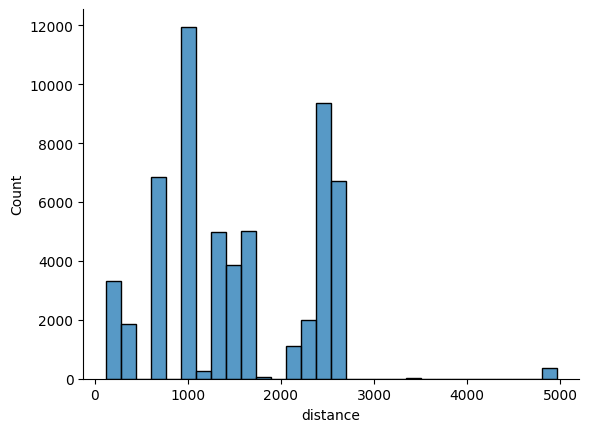

In [241]:
sns.histplot(x='distance', bins=_bin_edges, data=_df)
sns.despine();

Pandas has a method that can be used to create a Series that will hold the bin for each of the observations.

In [242]:
pd.cut(_df['distance'], _bin_edges)

0        (1246.967, 1408.533]
1          (1408.533, 1570.1]
2            (600.7, 762.267]
3          (2377.933, 2539.5]
4          (2539.5, 2701.067]
                 ...         
57777       (923.833, 1085.4]
57778        (116.0, 277.567]
57779    (1246.967, 1408.533]
57780        (116.0, 277.567]
57781      (2539.5, 2701.067]
Name: distance, Length: 57782, dtype: category
Categories (30, interval[float64, right]): [(116.0, 277.567] < (277.567, 439.133] < (439.133, 600.7] < (600.7, 762.267] ... (4316.733, 4478.3] < (4478.3, 4639.867] < (4639.867, 4801.433] < (4801.433, 4963.0]]

Additionally, we will select the right (inclusive) edge for easier interpretation and create the series.

This is the new one, with the same index as the helping data frame, plus we are giving it a new name.

In [243]:
(pd.Series(pd.cut(_df['distance'], _bin_edges).apply(lambda x: x.right), 
           name='bin', 
           index=_df.index))

0        1408.533
1        1570.100
2         762.267
3        2539.500
4        2701.067
           ...   
57777    1085.400
57778     277.567
57779    1408.533
57780     277.567
57781    2701.067
Name: bin, Length: 57782, dtype: category
Categories (30, float64): [277.567 < 439.133 < 600.700 < 762.267 ... 4478.300 < 4639.867 < 4801.433 < 4963.000]

Okay, let's add this to the existing helping data frame. This is one of the ways to perform the 'merging'. It is done by concatenating. You can concatenate a DataFrame with another DataFrame or with a Series.

In [244]:
_df

,distance,speed
0,1400,370.044053
1,1416,374.273128
2,719,287.6
3,2475,430.434783
4,2565,426.315789
...,...,...
57777,937,457.073171
57778,200,300.0
57779,1400,480.0
57780,200,324.324324


In [245]:
_df1 = pd.concat([
    _df, 
    pd.Series(pd.cut(_df['distance'], _bin_edges).apply(lambda x: x.right), 
              name='bin', 
              index=_df.index)
], axis=1)

print('Just the first 5 rows...')
_df1.head()

Just the first 5 rows...


,distance,speed,bin
0,1400,370.044053,1408.533
1,1416,374.273128,1570.100
2,719,287.6,762.267
3,2475,430.434783,2539.500
4,2565,426.315789,2701.067


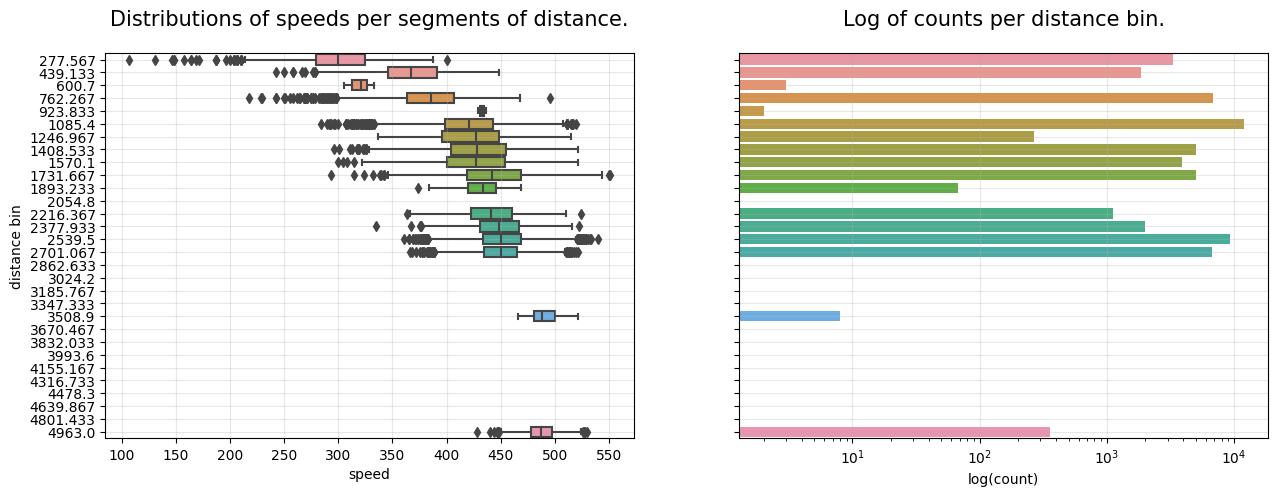

In [246]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

axes = axes.flatten()

sns.boxplot(x='speed', y='bin', data=_df1, ax=axes[0])

axes[0].set_ylabel('distance bin')
axes[0].set_title('Distributions of speeds per segments of distance.', size=15, pad=20);

axes[0].set_xticks(list(range(100, 600, 50)))
_y_tick_labels = [x.get_text() for x in axes[0].get_yticklabels()]
axes[0].set_yticklabels([f'{float(x):.0f}' for x in _y_tick_labels]);

axes[0].grid(alpha=.3)

sns.countplot(y='bin', data=_df1, ax=axes[1])
axes[1].set_ylabel('');
axes[1].set_xlabel('log(count)');
axes[1].set_title('Log of counts per distance bin.', size=15, pad=20);
axes[1].set_xscale('log')
axes[1].grid(alpha=.3)

Well, in general, it seems that the greater the distance, the greater the speed. Makes sense!

### Bonus

At the beginning, we showed the graphical representation of the missing values. But how did we do it?

There is a `seaborn` method called `heatmap`. It takes tabular data and creates a graphical representation of this table, but instead of showing the values, it colors the cell based on these values.

Example:

In [110]:
cont_table = {
    'true': {'true': 40, 'false': 20},
    'false': {'true': 20, 'false': 10}
}

_df = pd.DataFrame(cont_table)

_df

,true,false
true,40,20
false,20,10


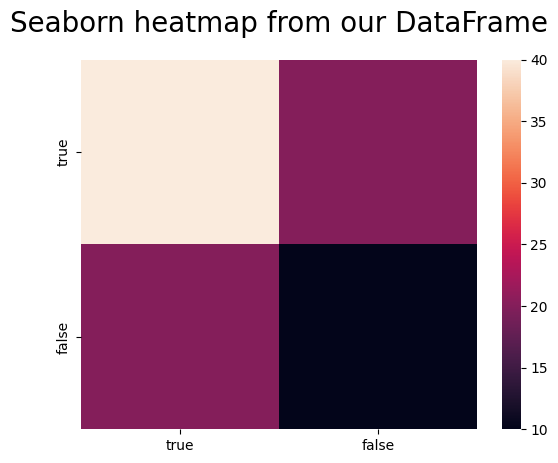

In [111]:
sns.heatmap(_df);
plt.title('Seaborn heatmap from our DataFrame', size=20, pad=20);

When checking for missing values in the dataset, we can call Pandas DataFrame method `isna`, which gives us a table of the same dimensions but with boolean values instead of the original ones. `True` is the value of the cell that has the missing values.

This way, we are able to use `seaborn` `heatmap` to represent this table of booleans in an appealing way.

Let's see how we can do this.

We will load the data once again because we need the original one that had missing values.

In [112]:
df = pd.read_csv('_data/flights_session06.csv', index_col=0)

df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,United Air Lines Inc.,1545,N14228,Newark Liberty Intl,George Bush Intercontinental,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,United Air Lines Inc.,1714,N24211,La Guardia,George Bush Intercontinental,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,American Airlines Inc.,1141,N619AA,John F Kennedy Intl,Miami Intl,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,JetBlue Airways,725,N804JB,John F Kennedy Intl,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,Delta Air Lines Inc.,461,N668DN,La Guardia,Hartsfield Jackson Atlanta Intl,116.0,762,6,0,2013-01-01 06:00:00


Let's make a list of column names where we have missing values.

First, get the list of all columns and the number of missing values for each.

In [113]:
df.isna().sum().sort_values(ascending=False)

arr_delay         9430
air_time          9430
arr_time          8713
dep_time          8255
dep_delay         8255
tailnum           2512
year                 0
origin               0
minute               0
hour                 0
distance             0
dest                 0
carrier              0
flight               0
month                0
sched_arr_time       0
sched_dep_time       0
day                  0
time_hour            0
dtype: int64

Then we want to sort them in decreasing order and take only those columns that have missing values.

In [114]:
(df.isna()
   .sum()
   .sort_values(ascending=False)
   .where(lambda x: x > 0)
   .dropna())

arr_delay    9430.0
air_time     9430.0
arr_time     8713.0
dep_time     8255.0
dep_delay    8255.0
tailnum      2512.0
dtype: float64

After that we want to store this as a list of column names.

In [115]:
null_columns =  (df.isna()
                   .sum()
                   .sort_values(ascending=False)
                   .where(lambda x: x > 0)
                   .dropna()
                   .index.to_list())

In the end, we create the `heatmap` with this 

Before plotting the `heatmap` here is how the table of booleans looks. Pay attention, it is transposed!

In [116]:
df[null_columns].isna().sort_values(by=null_columns, ascending=False).T

,1782,1784,2697,2698,3608,3609,4332,6098,6997,7895,...,336760,336761,336762,336763,336764,336765,336766,336767,336768,336769
arr_delay,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
air_time,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
arr_time,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
dep_time,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
dep_delay,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tailnum,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


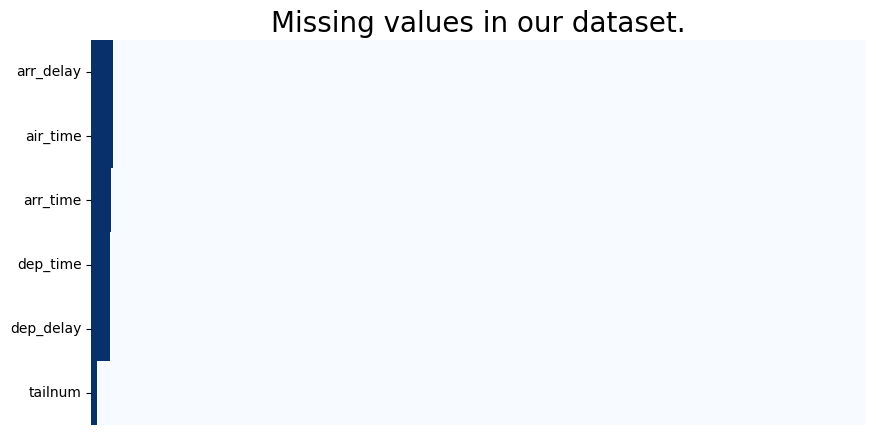

In [117]:
fig, ax = plt.subplots(figsize=(10, 5))

# changing the color mapping
rocket_cmap = sns.color_palette("Blues", as_cmap=True)

sns.heatmap(df[null_columns].isna().sort_values(by=null_columns, ascending=False).T, 
            cbar=False,  # disabling color bar on the right
            cmap=rocket_cmap, # setting the new color mapping
            ax=ax # one of the ways how we can explicitly set the destination axis
) 

sns.despine(bottom=True, left=True) # removing all of the spines
ax.set_xticks([])
ax.set_title('Missing values in our dataset.', size=20);

So, if we can use `heatmap` to visualize a DataFrame cell values... can we use the same for contigency tables? YES!

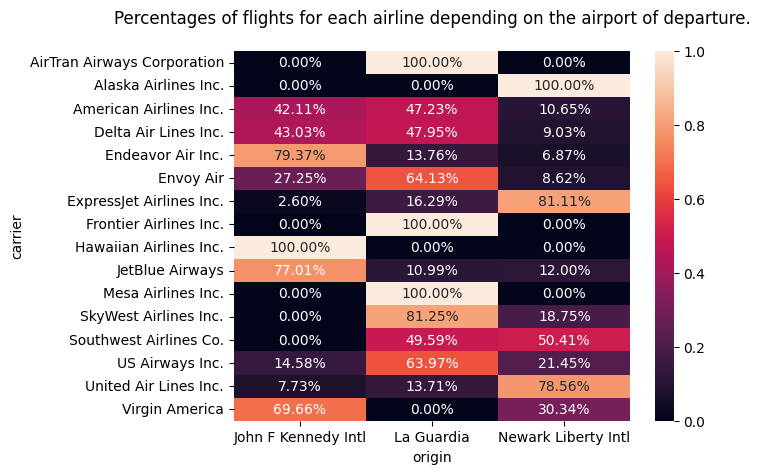

In [118]:
# our carrier/origin contigency table that is normalized by row data
_df = pd.crosstab(index=df['carrier'], columns=df['origin'], normalize='index')

sns.heatmap(_df, annot=True, fmt='.2%')
plt.title('Percentages of flights for each airline depending on the airport of departure.', size=12, pad=20);

### Readings and Videos
- [Matplotlib - Quick start guide](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)
- [Seaborn Gallery](https://seaborn.pydata.org/examples/index.html)
- [Visualizing Missing Data with Seaborn Heatmap and Displot](https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/)

### A highly recommended To Do
- [Bill Lubanovic, Introducing Python, 1st Edition](https://www.oreilly.com/library/view/introducing-python-2nd/9781492051374/), Chapter 13. Calendars and Clocks.
- [What are degrees of freedom?!? Seriously.](https://youtu.be/N20rl2llHno) 
- [Variance and Standard Deviation: Why divide by n-1?](https://youtu.be/wpY9o_OyxoQ)

<hr>

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>